In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

# Second method to get data
# dataset = load_diabetes()
# X = dataset.data
# Y = dataset.target
print(X.shape, y.shape)
X

(442, 10) (442,)


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [3]:
# Now just use only one feature from X
# Using 2nd index feature
X = X[:, np.newaxis, 2]
# To understand about newaxis function, refer: https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it 
X

array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
X_test.shape

(133, 1)

In [5]:
# Now instantiate LinearRegression class
regressor = LinearRegression()
# And call the fit() method along with our training data.
regressor.fit(X_train, y_train)
# Linear regression model finds the best value for the intercept and slope, which results in a line that best fits the data.
# To get intercept and slope calculated values by the linear regression algorithm for our dataset:
#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

152.98532138810083
[938.75147859]


In [6]:
# Now to predict
y_reg_pred = regressor.predict(X_test)
# Now let's compare the predicted with actual
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_reg_pred.flatten()})
df

,Actual,Predicted
0,71.0,114.781947
1,81.0,144.124080
2,61.0,149.183068
3,173.0,204.831940
4,109.0,100.616780
...,...,...
128,141.0,150.194866
129,258.0,154.242057
130,51.0,131.982508
131,237.0,260.480813


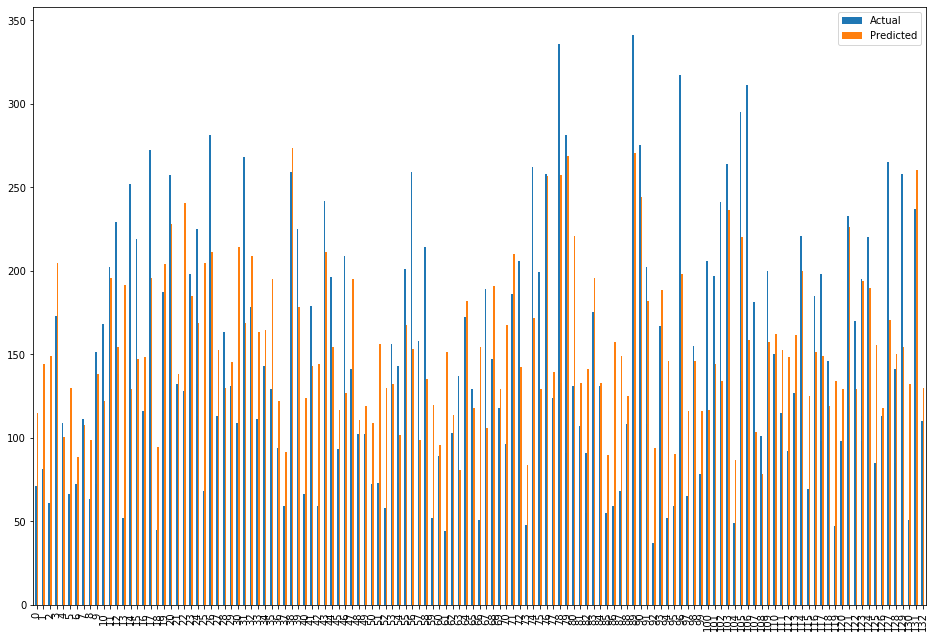

In [7]:
# Now to plot these on bar graph,
df1 = df
df.plot(kind='bar', figsize=(16, 11))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

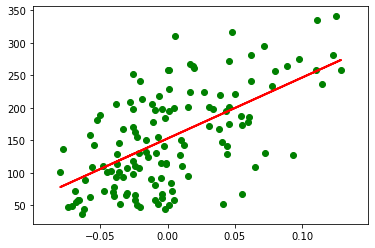

In [8]:
# Now plot a straight line with the test data:
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_reg_pred, color='red', linewidth='2')
plt.show()

### Now at last we need to evaluate the performance of the algorithm.

### For regression algorithms, 3 evaluation metrics are commonly used:
![Evaluation Metrics](images/mean_sq_error.png)

In [9]:
# Using scikit:
print('Mean Absolute Error: {}'.format(metrics.mean_absolute_error(y_test, y_reg_pred)))
print('Mean Squared Error: {}'.format(metrics.mean_squared_error(y_test, y_reg_pred)))
print('Root Mean Squared Error: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_reg_pred))))

Mean Absolute Error: 49.13321801160822
Mean Squared Error: 3563.815260128701
Root Mean Squared Error: 59.69769895170752
